### 히스토그램
- 히스토그램 : 히스토그램은 자료의 도수분포상태를 직사각형 막대그래프로 나타낸것
- 데이터의 빈도에(도수)에 따라 막대의 높이가 결정됨 (각 X값에 대한 Y값 누적도를 나타냄)
- plot()함수를 이용해 직선 혹은 꺾은선 그래프, Scatter()함수를 이용해 산포도
- histo()를 이용해 막대그래프를 그림.

In [1]:
import matplotlib.pyplot as plt

In [57]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns

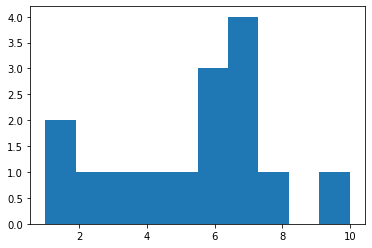

In [4]:
plt.hist([1,1,2,3,4,5,6,6,6,7,7,7,7,8,10])
plt.show()

In [10]:
dice=[]
for i in range(5):
    dice.append(np.random.randint(1,7))
print(dice)

[5, 4, 5, 3, 4]


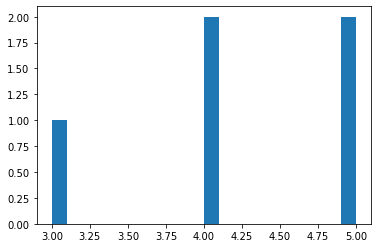

In [14]:
'''
bins의 값이 낮으면 막대그래프가 뭉뚱그려짐, bins가 커지면 촘촘해진다..?
histogram을 그릴때는 bins의 값을 잘 지정하는 것이 중요하다. 기본값도 적당
bins: 해당막대를 얼마나 채울건지 설정하는 값
'''
plt.hist(dice,bins=20)
plt.show() 

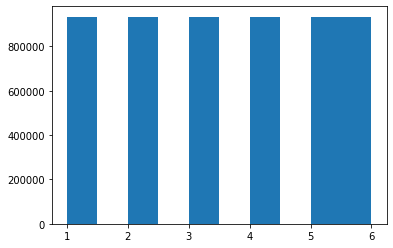

In [17]:
'''
주사위를 던지는 횟수를 늘릴 수록 특정한 숫자가 나오는 횟수가 전체의 1/6에 가까워짐.
== 큰수의 법칙
이를 히스토그램으로 확인
'''
for i in range(10000):
    dice.append(np.random.randint(1,7))
plt.hist(dice)
plt.show()

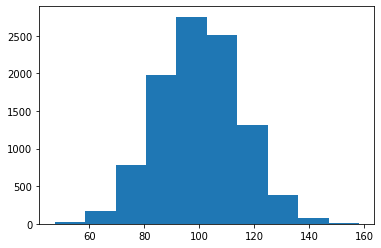

In [23]:
mu, sigma = 100, 15
x= mu+sigma*np.random.randn(10000)
x #값이 1만개 들어있음
len(x)
x.shape #tuple로 나오는 이유는 차원을 가르키기 위해서.

plt.hist(x) 
plt.show()

(array([  25.,  175.,  788., 1983., 2752., 2505., 1308.,  387.,   71.,
           6.]),
 array([ 47.37247203,  58.44735741,  69.5222428 ,  80.59712819,
         91.67201358, 102.74689896, 113.82178435, 124.89666974,
        135.97155513, 147.04644051, 158.1213259 ]),
 <a list of 10 Patch objects>)

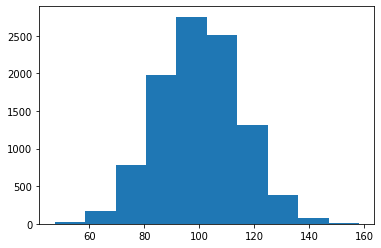

In [24]:
plt.hist(x) #n,bins,patchs가 리턴됨 patchs는 그래프 정보가 넘어옴

<a list of 200 Patch objects>
[ 47.37247203  47.9262163   48.47996056  49.03370483  49.5874491
  50.14119337  50.69493764  51.24868191  51.80242618  52.35617045
  52.90991472  53.46365899  54.01740326  54.57114753  55.1248918
  55.67863607  56.23238034  56.78612461  57.33986887  57.89361314
  58.44735741  59.00110168  59.55484595  60.10859022  60.66233449
  61.21607876  61.76982303  62.3235673   62.87731157  63.43105584
  63.98480011  64.53854438  65.09228865  65.64603292  66.19977718
  66.75352145  67.30726572  67.86100999  68.41475426  68.96849853
  69.5222428   70.07598707  70.62973134  71.18347561  71.73721988
  72.29096415  72.84470842  73.39845269  73.95219696  74.50594123
  75.05968549  75.61342976  76.16717403  76.7209183   77.27466257
  77.82840684  78.38215111  78.93589538  79.48963965  80.04338392
  80.59712819  81.15087246  81.70461673  82.258361    82.81210527
  83.36584954  83.9195938   84.47333807  85.02708234  85.58082661
  86.13457088  86.68831515  87.24205942  87.7958

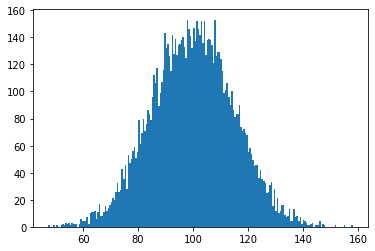

In [38]:
#값의 정보를 더 세밀하게 보고싶다면? bins 추가
n,bins,patches = plt.hist(x,bins=200)
print(patches)
print(bins) # 계급의 개수
print(n) #빈도수

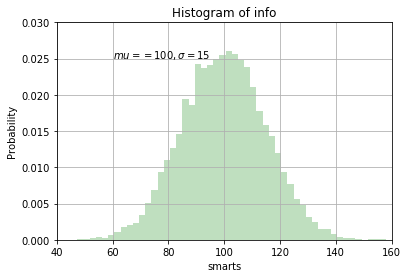

In [56]:
n,bins, patches = plt.hist(x,bins=50,density=1,facecolor='g',alpha=0.25) #alpha투명도,facecolor RGB
plt.xlabel('smarts')
plt.ylabel('Probability')
plt.title('Histogram of info')
plt.grid()

plt.text(60,0.025,'$mu==100, \sigma=15$') #$안에 \를 써주면 기호로 쓸수있다.
plt.axis([40,160,0,0.03]) #그림판 자르기 효과
plt.show()

### Pandas를 이용한 Plot 시각화

In [59]:
ts = pd.Series(np.random.randn(1000),
            index=pd.date_range('1/1/2000',periods=1000)) #periods 기본값 day

ts

2000-01-01   -1.595972
2000-01-02    0.337385
2000-01-03   -0.622161
2000-01-04    0.223522
2000-01-05   -0.828476
                ...   
2002-09-22   -1.982783
2002-09-23    0.632959
2002-09-24    0.308069
2002-09-25   -0.346304
2002-09-26    0.162575
Freq: D, Length: 1000, dtype: float64

In [60]:
ts = ts.cumsum() #누적된 값으로 표현

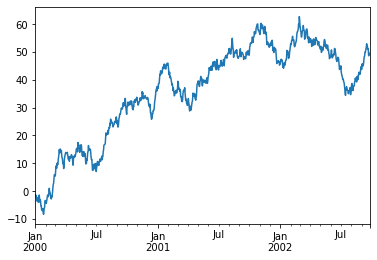

In [61]:
ts.plot()

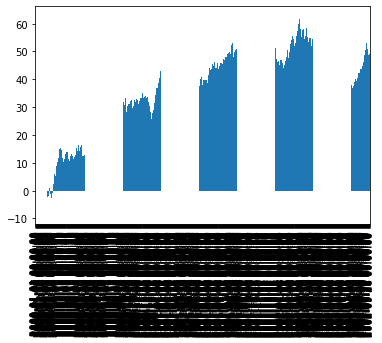

In [62]:
ts.plot(kind='bar') # 그릴 수 있지만 값에 알맞는 그래프가 아니기 때문에 이상한 형태로 출력됨

In [65]:
x=np.linspace(0,14,100) # 0에서 14까지의 값을 100간격으로 쪼갤때 사용
y = np.sin(x)

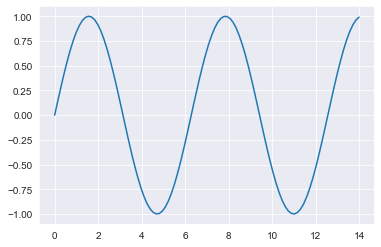

In [75]:
#그래프의 스타일 결정
sns.set_style('darkgrid')#white, dark, whitegrid, darkgride,trick
plt. plot(x,y)

### Seaborn - boxplot
- 중간값을 기준으로 하위 25%~ 상위 25%를 보여주는 그래프
- 박스 값은 딱 중간값임(=/=평균값)
- 박스 값을 넘어가는 값 : 이상치
- 이상치를 관리하기 위해 삭제하거나 수정함
- 평균은 실제 중앙이 아니기 때문에 중앙 값을 확인하기위해 사용
- 4분위로 나눈다. (2,3분위의 사이를 중앙값으로 사용 짝수의 경우 2개가 나올 때도 있음)

In [77]:
# 0부터 100까지 총 101개의 숫자를 만든다. 
xs=np.array(np.linspace(start=0,stop=100, num=101))
xs

df = DataFrame(xs,columns=['feature'])
df
#중간값과 평균값

,feature
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
96,96.0
97,97.0
98,98.0
99,99.0


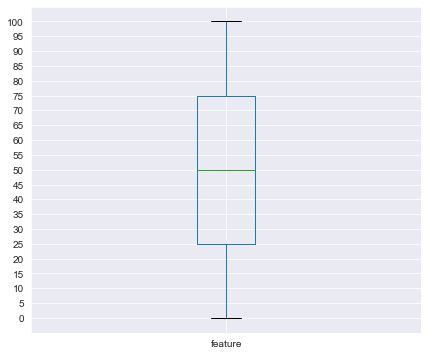

In [85]:
'''
출력결과를 보면,
25,75사이에 박스가 그려지고 중앙값인 50에 녹색선이 그려짐.
검은색 실선은 최소값과 최대값을 나타냄
전체 데이터를 4등분함
4분위
'''
plt.figure(figsize=(7,6))
df.boxplot(column=['feature'])
plt.yticks(np.arange(0,101,step=5)) #y축 간격 지정
plt.show()

In [86]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


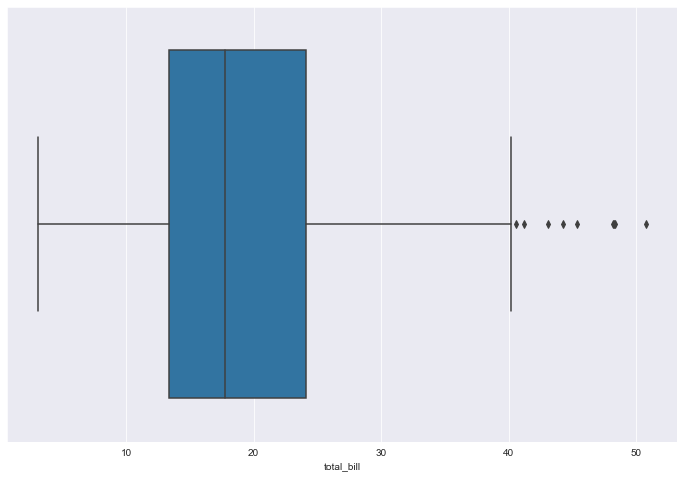

In [92]:
plt.figure(figsize=(12,8))
# tips.boxplot(column='total_bill')
sns.boxplot(tips['total_bill']) #위와 같은 값
plt.show()

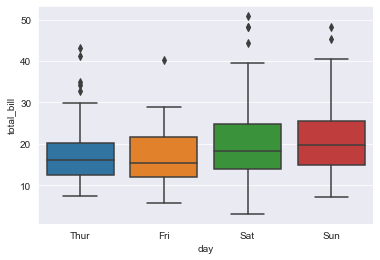

In [97]:
#요일별 음식지불금액을 boxplot
sns.boxplot(x='day',y='total_bill',data=tips)
plt.show() #중간값을 중심으로 상위 25%와 하위 25%의 차이가 크면 음식간의 편차가 크다라는 뜻.

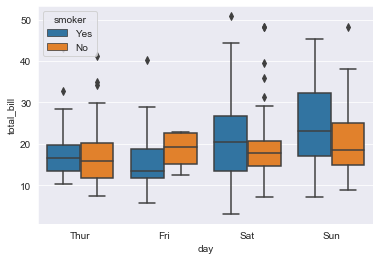

In [98]:
'''
hue 서로 비교해서 살펴볼 매개변수를 지정할 때 사용, 색상으로 대조해서 나타낸다.
'''
sns.boxplot(x='day',y='total_bill',hue='smoker',data=tips,) #hue를 사용하면 해당 요일의 흡연자, 비흡연자를 비교해 확인할 수 있음.
plt.show()

### Boxplot 이상치값 제거하기
- boxplot 이상치 값 제거하는 방법
    1. 이상치값 제거
    2. 이상치값 변환 -> NaN을 많이 사용함.

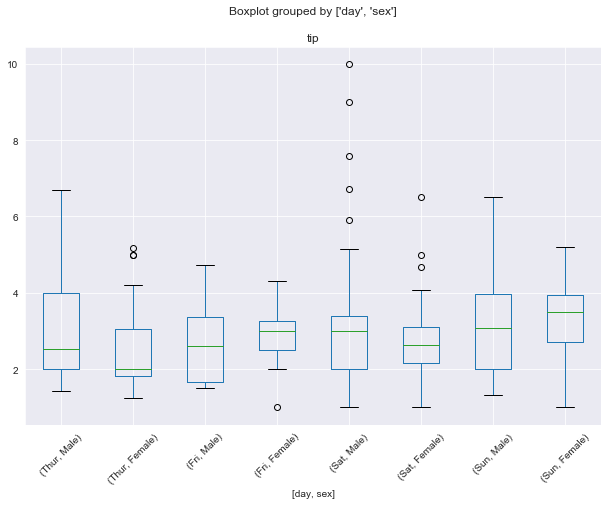

In [103]:
z = tips.boxplot(column=['tip'],by=['day','sex'],figsize=(10,7))
plt.xticks(rotation=45)
plt.show()

In [105]:
#이상치값 제거 함수
def removeOutlier(x,column):
    #Q1과 Q3구하기 (하위25%, 상위 25%찾기)
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    
    #iqt(IQR 범위를 벗어난 값 == 4분위 값을 벗어난 값) 여기를 조정하면 원하는 이상치의 범위가 조정됨
    iqt = 1.5*(q3-q1)
    
    #원래 데이터 복제
    y=x
    
    y['tip'][(tips['tip']>(q3+iqt)) | (tips['tip']<(q1-iqt))] = None
    y['tip']
    
    return y

C:\lje\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


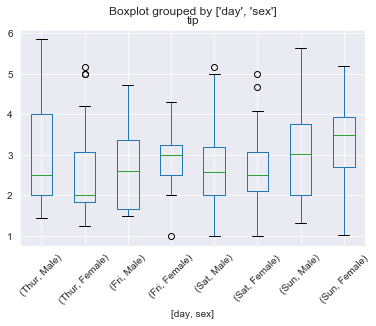

In [106]:
removeOutlier(tips,'tip').boxplot(column='tip',by=['day','sex'])
plt.xticks(rotation=45)
plt.show()

### lmplot

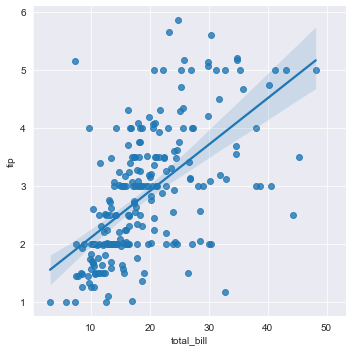

In [109]:
'''
선:
쉐도우:
의 의미
이 그래프를 어떤 데이터를 어떻게 적용하면 좋은지?
각 그래프의 특징:
'''
sns.lmplot(x = 'total_bill',y='tip',data=tips)
plt.show()

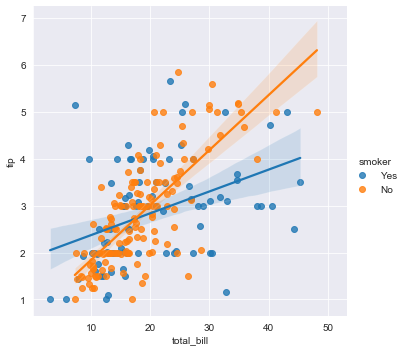

In [111]:
'''
total_bill에 따른 tip을 더 많이 주는 사람이
흡연자인지? 비흡연자인지? 여부를 알기 위해선 hue추가
'''
sns.lmplot(x = 'total_bill',y='tip',hue='smoker',data=tips)
plt.show()

### HeatMap

In [112]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [117]:
#pivot을 사용하여 index month columns year value passenger
#종합적으로, 월별, 연별로 봐야할때 heatmap사용
# flights=flights.pivot_table(values='passengers',index='month',columns='year')
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


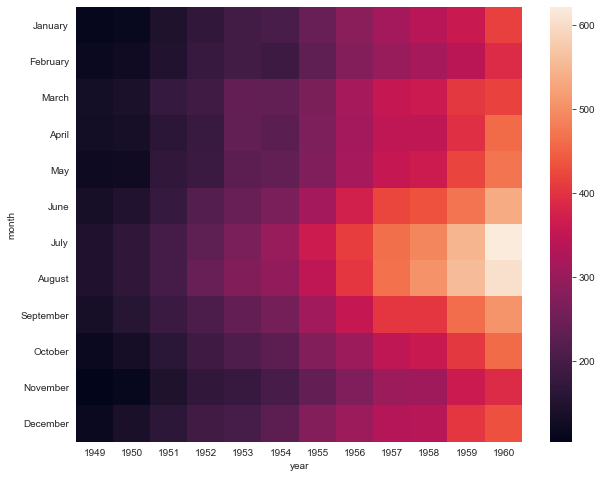

In [118]:
plt.figure(figsize=(10,8))
sns.heatmap(flights) #defalut값이 안보임.
plt.show()

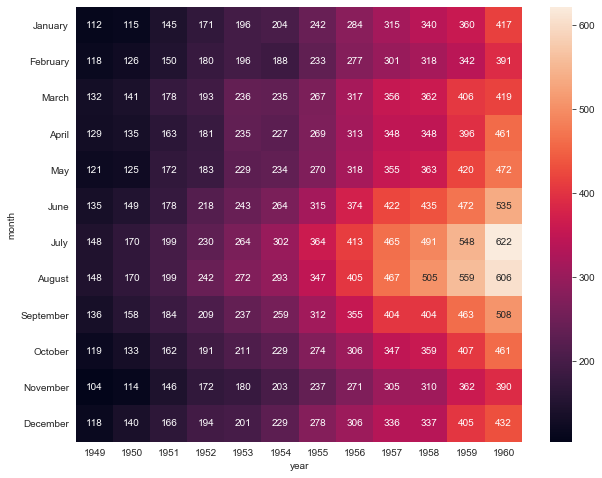

In [119]:
# x축은 year y축은 month
# 값이 점점 커지는 쪽-> 점점 환해짐 => 1960년 7월에 많이 입출국.
plt.figure(figsize=(10,8))
sns.heatmap(flights,annot=True, fmt= 'd') #default값 설정 annot == annotation, fmt == fermit 
plt.show()